<a href="https://colab.research.google.com/github/shobhitsundriyal/Revisit_ML/blob/master/Cnn_pytorch_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### ConvNets on CiFAR-10

In [0]:
import torch
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# Load the data

import torchvision
import torchvision.transforms as transforms

train_set = torchvision.datasets.CIFAR10(
    root='./data',
    download=True,
    train=True,
    transform=transforms.ToTensor()
)

Extracting ./data/cifar-10-python.tar.gz to ./data


In [0]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship']

In [0]:
trainloader = torch.utils.data.DataLoader(train_set, shuffle=True, batch_size=4)

In [22]:
data_iter = iter(trainloader)
images, labels = next(data_iter)

print(images.shape) # [batch_size, channels, hieght, width]

print(images[0].shape)# [channels, hieght, width]
print(labels[0].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
5


###### Visualize data

In [7]:
img = images[0]
type(img)

torch.Tensor

In [8]:
npimg = img.numpy()
npimg.shape

(3, 32, 32)

In [9]:
npimg = np.transpose(npimg, (1,2,0)) # (a, b, c) => (b, c, a)
npimg.shape

(32, 32, 3)

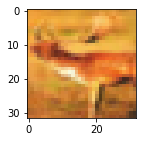

In [10]:
plt.figure(figsize=(2,2))
plt.imshow(npimg)
plt.show()

In [0]:
def imgshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

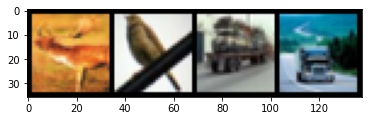

In [13]:
# Or
imgshow(torchvision.utils.make_grid(images))
#print(' '.join(classes[labels[i]] for i in range(4)))

##### Single Layer Conv-net

In [0]:
import torch.nn as nn

class FCNN(nn.Module):
  def __init__(self):
    super(FCNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, 3) # (3 num_channels, 16 kernels, kernel_size=3)

  def forward(self, x):
    x = self.conv1(x)
    return(x)

In [0]:
net = FCNN()

In [17]:
out =  net(images)
out.shape
# ([batch_size, num_output_channels, height, width])

torch.Size([4, 16, 30, 30])

In [18]:
# Possible due to nn.Module
for param in net.parameters():
  print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [23]:
# let's visulize o/p from one of the kernels

out1 = out[0, 0, :, :].detach().numpy()
out1.shape

(30, 30)

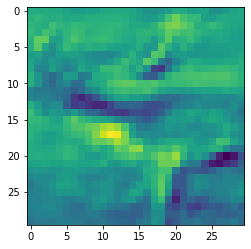

In [24]:
plt.imshow(out1)
plt.show()

In [0]:
def im_show(x):
  plt.imshow(x)
  plt.show()

In [0]:
im_show(torchvision.utils.make_grid(out[0,i,:,:].detach().numpy()) for i in range(16))

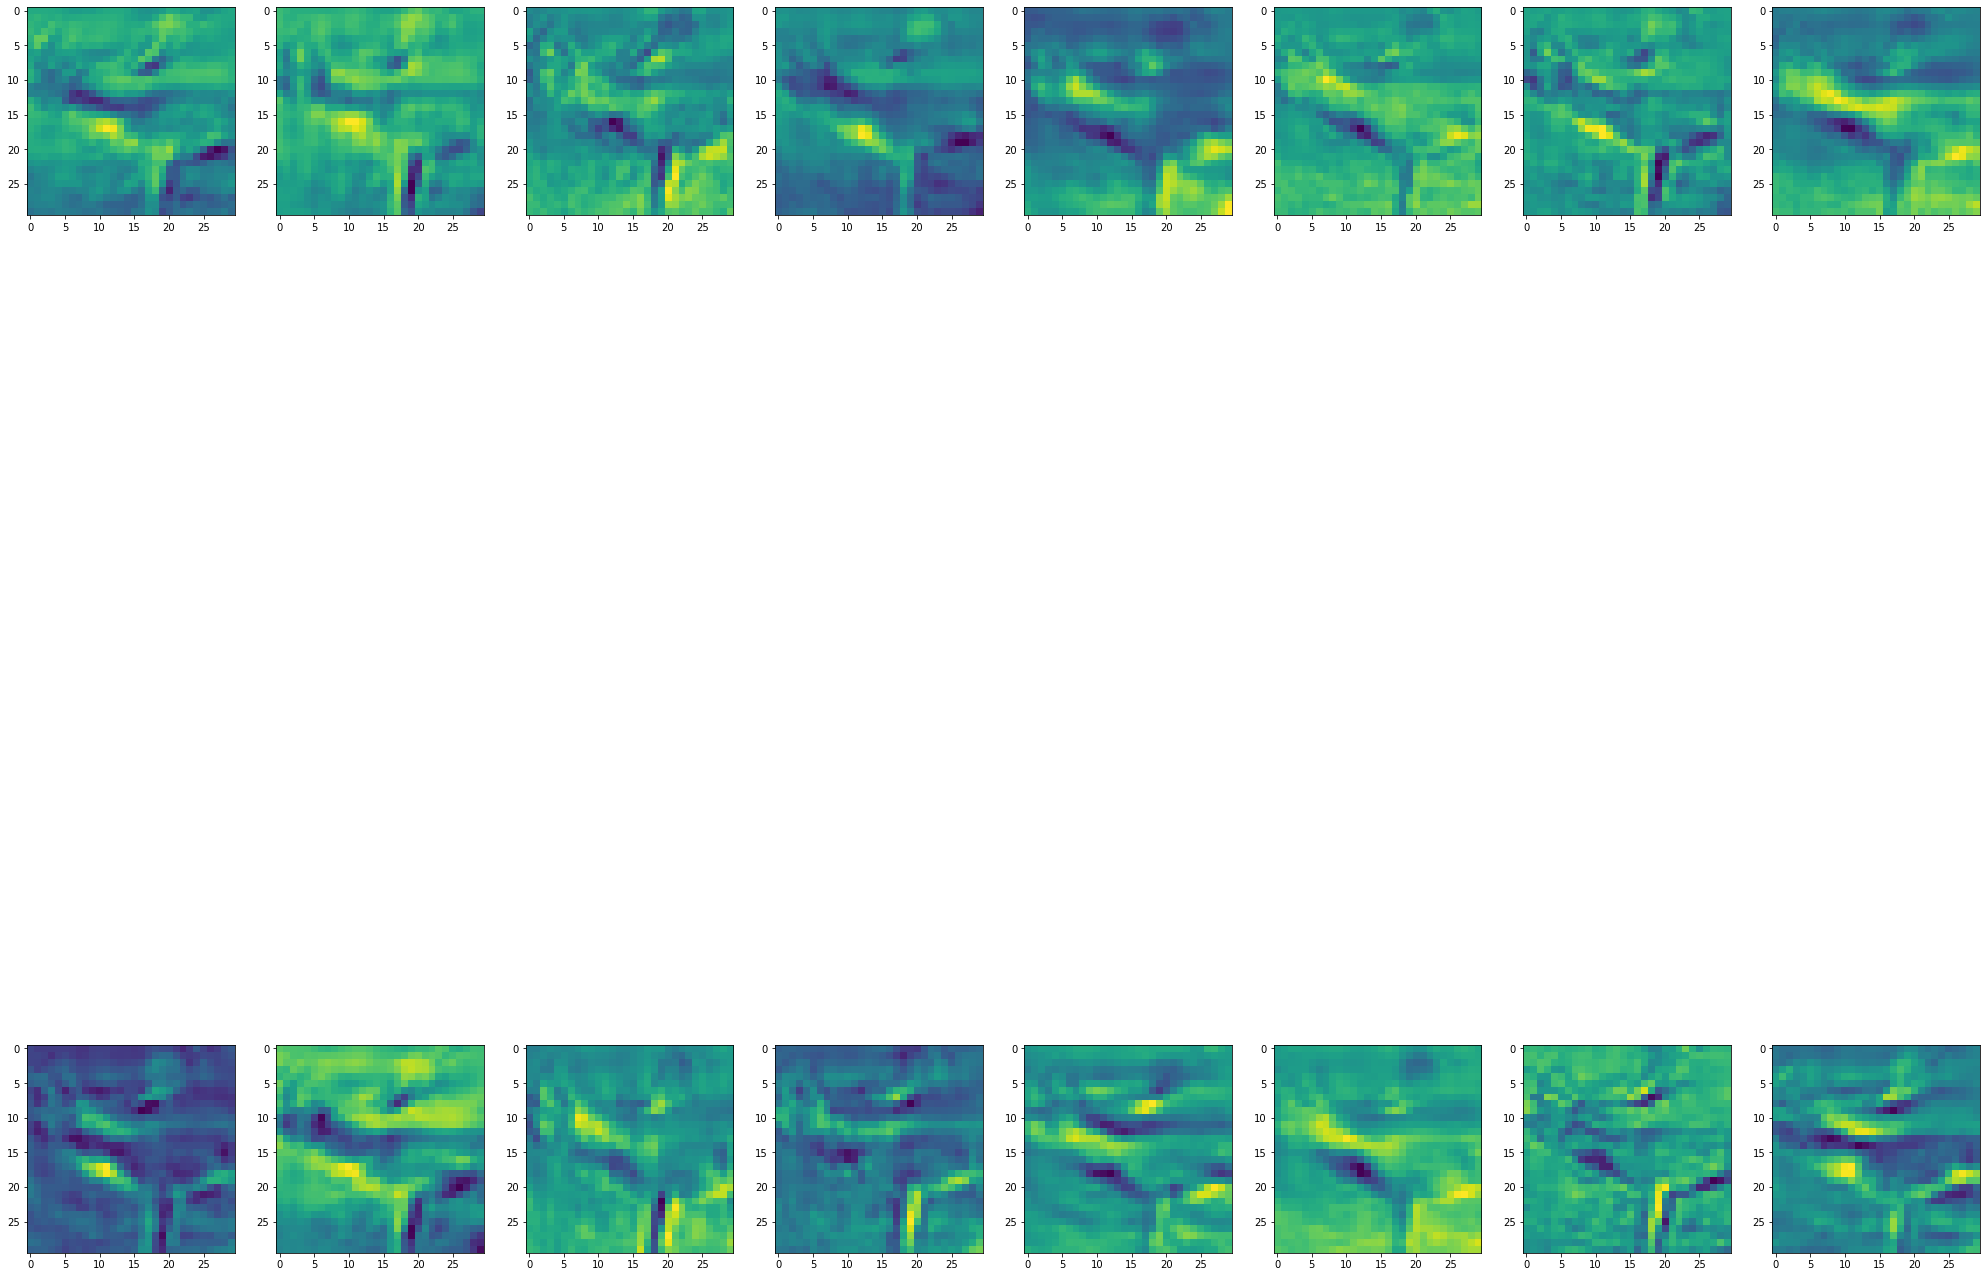

In [66]:
# For first img let's output from each kernel
fig, ax = plt.subplots(2, 8, figsize=(35,35))
ax = ax.ravel()# counting
for i in range(16):
  ot = out[0, i, :,:].detach().numpy()
  ax[i].imshow(ot) #, cmap='gray')

---

##### Deep ConvNet

In [0]:
class DCNN(nn.Module):

  def __init__(self):
    super(DCNN, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 8, 3),  #(N, 3, 32, 32) => (N, 8, 30, 30)    | (a,b,c) => (b, d, e)
        nn.Conv2d(8, 16, 3)  #(N, 8, 30, 30) => (N, 16, 28, 28)
    )

  def forward(self, x):
    x = self.model(x)
    return x

In [68]:
net = DCNN()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

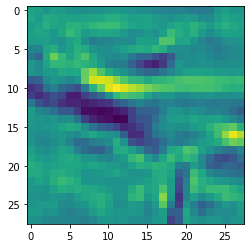

In [69]:
plt.imshow(out[0,0, :, :].detach().numpy())

---

In [0]:
class DCNN_v2(nn.Module):

  def __init__(self):
    super(DCNN_v2, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) => (N, 6, 28, 28)
        nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) => (N, 6, 14, 14)
        nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) => (N, 16, 10, 10)
        nn.AvgPool2d(2, stride=2)   # (N, 16, 10, 10) => (N, 6, 5, 5)
    )

  def forward(self, x):
    x = self.model(x)
    return x

In [75]:
net = DCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

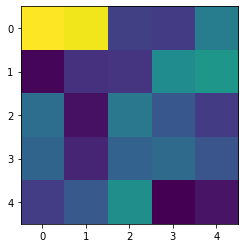

In [76]:
plt.imshow(out[0,0, :, :].detach().numpy())

---

##### LeNet

In [0]:
class LeNet(nn.Module):

  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5),
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6, 16, 5),
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2)
    )

    self.fc_model = nn.Sequential(
        nn.Linear(400, 120),
        nn.Tanh(),
        nn.Linear(120, 84),
        nn.Tanh(),
        nn.Linear(84, 10)
    )

  def forward(self, x):
    print('Initial shape:' + str(x.shape))
    x = self.cnn_model(x)
    print('After CNN ' + str(x.shape))
    #flatten (except batch size)
    x = x.view(x.size(0), -1)
    print('After flattening ' + str(x.shape))
    x = self.fc_model(x)
    print('After FC ' + str(x.shape))
    return x 

In [86]:
net = LeNet()
out = net(images)

Initial shape:torch.Size([4, 3, 32, 32])
After CNN torch.Size([4, 16, 5, 5])
After flattening torch.Size([4, 400])
After FC torch.Size([4, 10])


In [87]:
out

tensor([[-0.0852,  0.0934, -0.0442,  0.0014,  0.0217,  0.0702, -0.0504, -0.1155,
         -0.0214, -0.0684],
        [-0.0864,  0.1085, -0.0451,  0.0154,  0.0179,  0.0344, -0.0413, -0.1349,
         -0.0360, -0.0635],
        [-0.0743,  0.1155, -0.0570,  0.0212,  0.0314,  0.0539, -0.0569, -0.1154,
         -0.0497, -0.0781],
        [-0.0784,  0.1292, -0.0667,  0.0066,  0.0450,  0.0338, -0.0558, -0.1052,
         -0.0219, -0.0954]], grad_fn=<AddmmBackward>)

In [98]:
# no learning pred
print(f'Real : {classes[labels[0].item()]}')
print(f'Predicted: {classes[out[0].argmax().item()]}')

Real : deer
Predicted: car


In [99]:
max_values, pred_classes = torch.max(out.data, 1)
pred_classes

tensor([1, 1, 1, 1])

all pred class 1

###### Training LeNet

In [0]:
class LeNet(nn.Module):

  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5),
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6, 16, 5),
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2)
    )

    self.fc_model = nn.Sequential(
        nn.Linear(400, 120),
        nn.Tanh(),
        nn.Linear(120, 84),
        nn.Tanh(),
        nn.Linear(84, 10)
    )

  def forward(self, x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model(x)
    return x 

In [6]:
batch_size = 128
train_set = torchvision.datasets.CIFAR10(root='/data', train=True, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_set = torchvision.datasets.CIFAR10(root='/data', train=False, download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

Extracting /data/cifar-10-python.tar.gz to /data
Files already downloaded and verified


In [0]:
def evaluation(dataloader):
  total, correct = 0,0
  for data in dataloader:#per batch
    inputs, labels = data
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

In [0]:
net = LeNet()

In [0]:
import torch.optim as optim
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch 0 / 16, Test acc: 42.76, Train acc: 42.94
Epoch 1 / 16, Test acc: 46.48, Train acc: 46.66
Epoch 2 / 16, Test acc: 48.71, Train acc: 49.37
Epoch 3 / 16, Test acc: 50.12, Train acc: 52.08
Epoch 4 / 16, Test acc: 52.27, Train acc: 54.23
Epoch 5 / 16, Test acc: 52.12, Train acc: 55.34
Epoch 6 / 16, Test acc: 53.64, Train acc: 57.01
Epoch 7 / 16, Test acc: 53.73, Train acc: 58.19
Epoch 8 / 16, Test acc: 53.76, Train acc: 59.30
Epoch 9 / 16, Test acc: 53.73, Train acc: 59.73
Epoch 10 / 16, Test acc: 54.21, Train acc: 60.69
Epoch 11 / 16, Test acc: 55.12, Train acc: 62.61
Epoch 12 / 16, Test acc: 54.66, Train acc: 62.34
Epoch 13 / 16, Test acc: 54.88, Train acc: 64.18
Epoch 14 / 16, Test acc: 55.31, Train acc: 64.74
Epoch 15 / 16, Test acc: 54.71, Train acc: 65.32


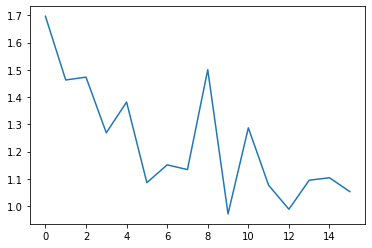

CPU times: user 7min 28s, sys: 5.77 s, total: 7min 34s
Wall time: 7min 35s


In [113]:
%%time
loss_arr = []
loss_epochs_arr = []
max_epochs = 16

for epochs in range(max_epochs):

  for i, data in enumerate(train_loader):

    inputs, labels = data

    opt.zero_grad()

    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    loss_arr.append(loss.item()) # loss after every step

  loss_epochs_arr.append(loss.item()) #loss after each epoch

  print('Epoch %d / %d, Test acc: %0.2f, Train acc: %0.2f' % (epochs, max_epochs, evaluation(test_loader), evaluation(train_loader)))

plt.plot(loss_epochs_arr)
plt.show()

Move to gpu

In [10]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [0]:
def evaluation(dataloader):
  total, correct = 0,0
  for data in dataloader:#per batch
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

In [0]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters()) # use weight_decay for regularizaion

Epoch 0 / 16, Test acc: 37.40, Train acc: 37.32
Epoch 1 / 16, Test acc: 42.06, Train acc: 42.03
Epoch 2 / 16, Test acc: 45.48, Train acc: 46.58
Epoch 3 / 16, Test acc: 50.03, Train acc: 51.03
Epoch 4 / 16, Test acc: 50.24, Train acc: 52.28
Epoch 5 / 16, Test acc: 52.26, Train acc: 54.99
Epoch 6 / 16, Test acc: 53.09, Train acc: 56.63
Epoch 7 / 16, Test acc: 53.16, Train acc: 57.45
Epoch 8 / 16, Test acc: 54.19, Train acc: 58.92
Epoch 9 / 16, Test acc: 54.83, Train acc: 60.65
Epoch 10 / 16, Test acc: 54.85, Train acc: 61.08
Epoch 11 / 16, Test acc: 54.17, Train acc: 60.91
Epoch 12 / 16, Test acc: 55.86, Train acc: 63.63
Epoch 13 / 16, Test acc: 55.64, Train acc: 63.75
Epoch 14 / 16, Test acc: 56.27, Train acc: 65.04
Epoch 15 / 16, Test acc: 55.81, Train acc: 65.04


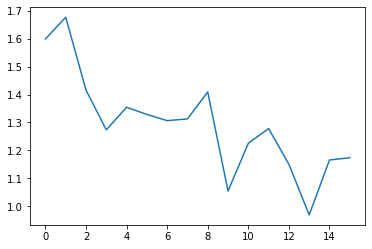

CPU times: user 3min 2s, sys: 980 ms, total: 3min 3s
Wall time: 3min 4s


In [14]:
%%time
loss_arr = []
loss_epochs_arr = []
max_epochs = 16

for epochs in range(max_epochs):

  for i, data in enumerate(train_loader):

    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    opt.zero_grad()

    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    loss_arr.append(loss.item()) # loss after every step

  loss_epochs_arr.append(loss.item()) #loss after each epoch

  print('Epoch %d / %d, Test acc: %0.2f, Train acc: %0.2f' % (epochs, max_epochs, evaluation(test_loader), evaluation(train_loader)))

plt.plot(loss_epochs_arr)
plt.show()

###### Basic Vizualizations

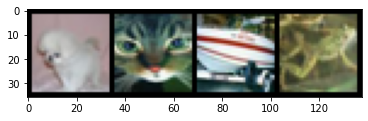

In [25]:
imgshow(torchvision.utils.make_grid(images))

In [27]:
net.to('cpu') #images are in cpu

LeNet(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [28]:
out = net(images)
out.shape #[n_input, n_output]

torch.Size([4, 10])

In [29]:
out = net.cnn_model[0](images) #first conv layer
out.shape

torch.Size([4, 6, 28, 28])

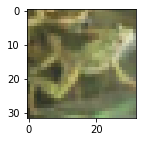

In [30]:
image_id = 3
plt.figure(figsize=(2,2))
imgshow(images[image_id,])

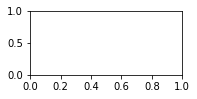

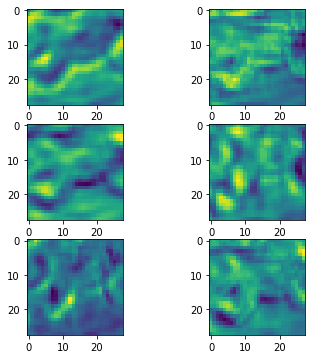

In [32]:
plt.subplot(321)
plt.figure(figsize=(6,6))
for i in range(6):
  ax1 = plt.subplot(3,2, i+1)
  plt.imshow(out[image_id, i, :, :].detach().numpy(), )#cmap='binary')

plt.show()